In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [47]:
df = pd.read_csv('2019-2.csv')

In [48]:
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 
         'FDPt', 'VBD', 'OvRank', 'PPR', 
         'Fmb', 'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1',
        'Cmp', 'Y/R'], axis = 1, inplace = True)

In [49]:
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

In [50]:
df.rename({
    'TD': 'PassingTD', 
    'TD.1': 'RushingTD', 
    'TD.2': 'ReceivingTD', 
    'TD.3': 'TotalTD', 
    'Yds': 'PassingYds', 
    'Yds.1': 'RushingYds', 
    'Yds.2': 'ReceivingYds', 
    'Att': 'PassingAtt', 
    'Att.1': 'RushingAtt'
}, axis = 1, inplace = True)

In [51]:
df['FantasyPoints'] = (df['PassingYds']*0.04 + df['PassingTD'] * 4 
                       - df['Int']*2 + df['RushingYds']*0.1 + 
                       df['RushingTD']*6 + df['Rec']*0.5 + 
                       df['ReceivingYds']*0.1 + df['ReceivingTD']*.6 
                       - df['FL']*2)


In [52]:
df['FantasyPoints/GM'] = df['FantasyPoints']/df['G']

In [53]:
df = df[df['Tm'] != '2TM']
df = df[df['Tm'] != '3TM']

In [54]:
rb_df = df[df['FantPos'] == 'RB']
rb_df['Rec/GM'] = rb_df['Rec']/rb_df['G']
rb_df = rb_df[rb_df['Rec/GM'] >3]

C:\Users\cjohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
rb_df.count()

Player              18
Tm                  18
FantPos             18
G                   18
PassingYds          18
PassingTD           18
Int                 18
RushingYds          18
RushingTD           18
Rec                 18
ReceivingYds        18
ReceivingTD         18
FL                  18
TotalTD             18
PosRank             18
FantasyPoints       18
FantasyPoints/GM    18
Rec/GM              18
dtype: int64

In [57]:
df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]
rb_df = rb_df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]

In [58]:
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

In [59]:
rb_df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,389.6,24.350000
3,GNB,RB,274.1,17.131250
4,DAL,RB,273.9,17.118750
5,MIN,RB,265.9,18.992857
9,LAC,RB,219.8,13.737500


In [60]:
ex_col_names = ['QB1', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE']

rand_num = np.random.randn(10,7)

example_df = pd.DataFrame(rand_num, columns = ex_col_names)

example_df

,QB1,RB1,RB2,WR1,WR2,WR3,TE
0,-1.540833,-1.759926,0.715773,0.257326,-1.119440,0.810333,0.822485
1,0.041393,0.320474,1.379578,-0.070046,0.625485,-1.037128,1.315871
2,0.205357,-1.160147,0.155462,-0.373761,-1.216660,0.856757,-1.284184
3,1.342501,-0.501244,-0.225877,1.548498,1.242791,0.225793,-0.855070
4,-0.253734,1.050282,0.581600,0.367709,-0.264864,1.160197,0.192070
5,0.750978,-1.187718,-0.007064,0.909151,-0.000409,-1.024048,1.246885
6,-0.641549,0.175793,0.840970,0.974862,-0.272688,1.146652,-0.575864
7,0.843652,-0.889872,-0.217683,-0.943221,-1.542629,-0.298576,-0.776044
8,-0.717026,-0.166538,-1.052585,0.575615,-0.989765,-0.259680,-0.002119
9,0.095996,-0.383255,1.328860,-0.305941,-0.370033,-1.597248,-0.988427


In [61]:
def  get_top_players(df,n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, 
        ['FantasyPoints']).min()).reset_index(drop = True)

In [62]:
qb_df = get_top_players(qb_df,1)
te_df = get_top_players(te_df,1)
rb1_df = get_top_players(rb_df,1)
rb2_df = get_top_players(rb_df,2)
wr1_df = get_top_players(wr_df,1)
wr2_df = get_top_players(wr_df,2)
wr3_df = get_top_players(wr_df,3)

In [63]:
new_names = {
    'QB1': qb_df,
    'TE1': te_df,
    'RB1': rb1_df,
    'RB2': rb2_df,
    'WR1': wr1_df,
    'WR2': wr2_df,
    'WR3': wr3_df
}

In [64]:
for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/GM': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)

In [65]:
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)

C:\Users\cjohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [66]:
df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
ARI,17.455000,2.220000,NaN,NaN,7.393750,7.393750,4.590909
ATL,17.689333,9.215385,10.464286,10.464286,12.813333,9.669231,4.306250
BAL,27.712000,8.080000,NaN,NaN,6.114286,3.287500,2.425000
BUF,17.660000,3.660000,NaN,NaN,10.094667,7.660000,2.960000
CAR,13.652308,6.207143,24.350000,24.350000,11.026667,7.018750,2.681250


In [67]:
df.corr()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
QB1,1.000000,0.276943,0.339821,0.441866,0.143047,0.160265,0.099336
TE1,0.276943,1.000000,0.323428,0.338498,-0.012716,-0.033204,-0.128213
RB1,0.339821,0.323428,1.000000,0.958572,0.162107,0.209133,-0.034506
RB2,0.441866,0.338498,0.958572,1.000000,0.274133,0.193522,-0.084276
WR1,0.143047,-0.012716,0.162107,0.274133,1.000000,0.269784,-0.056759
WR2,0.160265,-0.033204,0.209133,0.193522,0.269784,1.000000,0.386603
WR3,0.099336,-0.128213,-0.034506,-0.084276,-0.056759,0.386603,1.000000


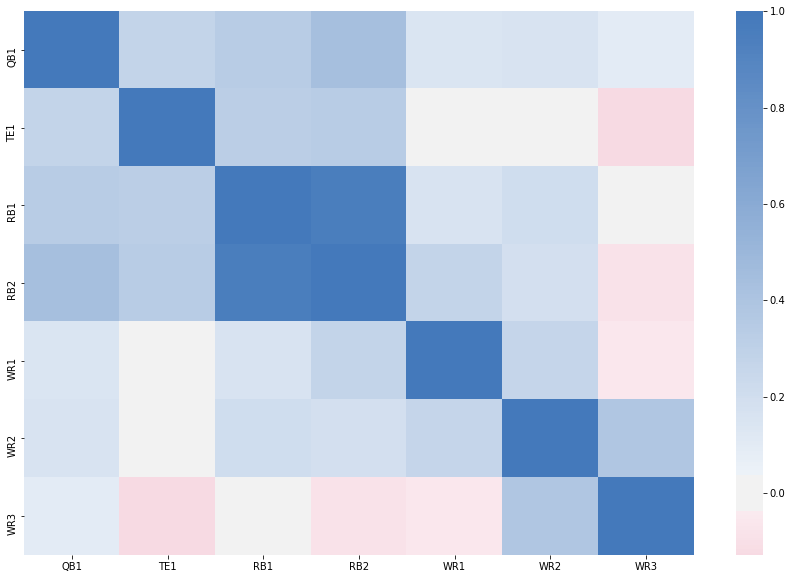

In [68]:
corrMatrix = df.corr()

fix,ax = plt.subplots()
fix.set_size_inches(15,10)

cmap = sns.diverging_palette(0,250, as_cmap = True)

vizCorrMatrix = sns.heatmap(corrMatrix, cmap = cmap, center= 0)

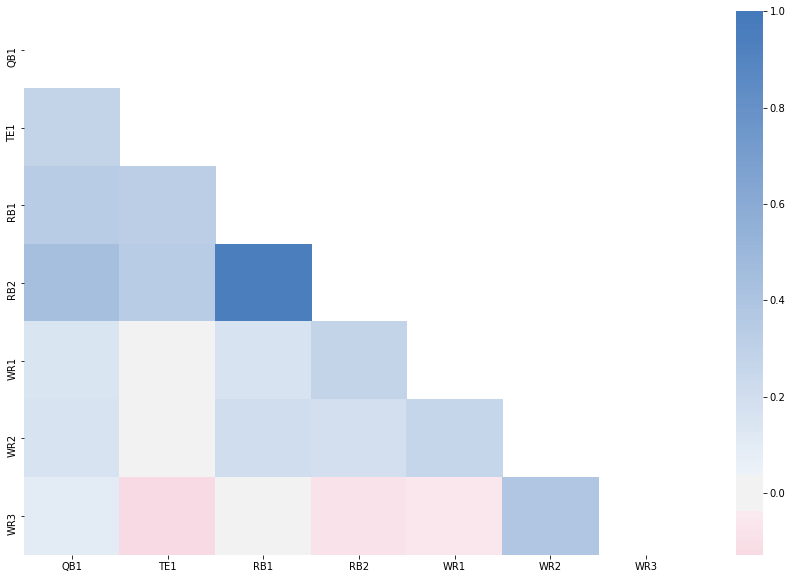

In [71]:
fig,ax = plt.subplots()
fig.set_size_inches(15,10)

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

vizCorrMatrix = sns.heatmap(corrMatrix, mask= mask, cmap=cmap, center=0)